## Name : VIGHNESH SOMANI 

## PROJECT OBJECTIVE

The objective of this project is to analyze individual investment preferences and identify the key factors influencing investment decisions among respondents. Using Python-based data analytics techniques, the study aims to:

1.Explore demographic and behavioral patterns (e.g., age, gender, investment avenues).

2.Understand how different factors (returns, risk, duration, etc.) affect investment choices.

3.Apply statistical inference to test relationships between demographic factors and investment preferences.

4.Develop predictive models (Logistic Regression) to classify investors based on their mutual fund preference.

5.Use clustering techniques (K-Means) to group investors with similar investment behaviors.

ultimately , this project seeks to derive meaningful insights into investor psychology and prefernces ,helping institutions and design.

source

https://www.kaggle.com/datasets/ayeshasiddiqa123/finance-trends-2020-2025/data

## DATASET OVERVIEW

The dataset is structured, mixed-type, and suitable for both descriptive (EDA) and predictive analytics.
It includes:

8 numerical ratings capturing investment preferences,

15 categorical attributes describing behavioral and motivational aspects, and

1 derived binary target variable for classification tasks.

Rows: 12,000 total (10,389 unique after removing 1,611 duplicates)

Columns: 24 attributes describing demographic details, investment preferences, motivations, and influencing factors.




## STEP 2 - DATA CLEANING AND PREPARATION 

## 1. CHECKING AND HANDLING MISSING VALUES 

In [15]:
import pandas as pd 
df= pd.read_csv('Finance_Trends.csv')


df.isnull().sum()
df.head()

,gender,age,Investment_Avenues,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,...,Duration,Invest_Monitor,Expect,Avenue,What are your savings objectives?,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source
0,Male,29,Yes,2,4,7,5,3,1,6,...,Less than 1 year,Weekly,20%-30%,Public Provident Fund,Health Care,Dividend,Fund Diversification,Assured Returns,Fixed Returns,Newspapers and Magazines
1,Male,28,Yes,2,3,6,5,1,4,7,...,Less than 1 year,Weekly,30%-40%,Public Provident Fund,Retirement Plan,Capital Appreciation,Better Returns,Assured Returns,Risk Free,Television
2,Female,28,Yes,2,3,7,5,4,1,6,...,3-5 years,Daily,10%-20%,Mutual Fund,Health Care,Dividend,Better Returns,Assured Returns,Risk Free,Financial Consultants
3,Male,19,Yes,2,3,7,4,6,1,5,...,More than 5 years,Monthly,10%-20%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Assured Returns,Risk Free,Newspapers and Magazines
4,Male,32,Yes,2,4,7,5,3,1,6,...,More than 5 years,Weekly,10%-20%,Public Provident Fund,Retirement Plan,Capital Appreciation,Better Returns,Assured Returns,Fixed Returns,Financial Consultants


JUSTIFICATION - Handling missing values avoids biases or errors in statistical analysis and model training 

## 2. REMOVING DUPLICATES AND IRRELEVANT COLUMNS

In [19]:
df.duplicated().sum()
df = df.drop_duplicates()
df.head()


,gender,age,Investment_Avenues,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,...,Duration,Invest_Monitor,Expect,Avenue,What are your savings objectives?,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source
0,Male,29,Yes,2,4,7,5,3,1,6,...,Less than 1 year,Weekly,20%-30%,Public Provident Fund,Health Care,Dividend,Fund Diversification,Assured Returns,Fixed Returns,Newspapers and Magazines
1,Male,28,Yes,2,3,6,5,1,4,7,...,Less than 1 year,Weekly,30%-40%,Public Provident Fund,Retirement Plan,Capital Appreciation,Better Returns,Assured Returns,Risk Free,Television
2,Female,28,Yes,2,3,7,5,4,1,6,...,3-5 years,Daily,10%-20%,Mutual Fund,Health Care,Dividend,Better Returns,Assured Returns,Risk Free,Financial Consultants
3,Male,19,Yes,2,3,7,4,6,1,5,...,More than 5 years,Monthly,10%-20%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Assured Returns,Risk Free,Newspapers and Magazines
4,Male,32,Yes,2,4,7,5,3,1,6,...,More than 5 years,Weekly,10%-20%,Public Provident Fund,Retirement Plan,Capital Appreciation,Better Returns,Assured Returns,Fixed Returns,Financial Consultants


Justification: Duplicate removal prevents model bias and ensures each record represents a unique respondent.

## 3. HANDLING OUTLIERS 

In [23]:
import pandas as pd
import numpy as np

# Select only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

#  Loop through each numeric column
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

      # Identify outliers
    outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]

    print(f"Column: {col}")
    print(f"  Q1 = {Q1}, Q3 = {Q3}, IQR = {IQR}")
    print(f"  Lower Limit = {lower_limit}, Upper Limit = {upper_limit}")
    print(f"  Outliers Detected: {outliers.shape[0]}")
    print("-" * 60)

  # Handle outliers: Option 1 - Cap them (Winsorization)
    df[col] = np.where(df[col] < lower_limit, lower_limit,
                       np.where(df[col] > upper_limit, upper_limit, df[col]))

# Verify that outliers have been capped
print("\n✅ Outlier treatment complete using IQR capping method.")



Column: age
  Q1 = 25.0, Q3 = 31.0, IQR = 6.0
  Lower Limit = 16.0, Upper Limit = 40.0
  Outliers Detected: 0
------------------------------------------------------------
Column: Mutual_Funds
  Q1 = 2.0, Q3 = 3.0, IQR = 1.0
  Lower Limit = 0.5, Upper Limit = 4.5
  Outliers Detected: 749
------------------------------------------------------------
Column: Equity_Market
  Q1 = 3.0, Q3 = 4.0, IQR = 1.0
  Lower Limit = 1.5, Upper Limit = 5.5
  Outliers Detected: 1013
------------------------------------------------------------
Column: Debentures
  Q1 = 5.0, Q3 = 7.0, IQR = 2.0
  Lower Limit = 2.0, Upper Limit = 10.0
  Outliers Detected: 234
------------------------------------------------------------
Column: Government_Bonds
  Q1 = 4.0, Q3 = 5.0, IQR = 1.0
  Lower Limit = 2.5, Upper Limit = 6.5
  Outliers Detected: 1763
------------------------------------------------------------
Column: Fixed_Deposits
  Q1 = 3.0, Q3 = 5.0, IQR = 2.0
  Lower Limit = 0.0, Upper Limit = 8.0
  Outliers Detect

Justification: Ensures data integrity while preserving valid responses within the rating range.

## 4. ENCODING CATEGORICAL DATA 

In [27]:

import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", list(cat_cols))

#  Apply Label Encoding for binary / ordinal categorical columns
le = LabelEncoder()


for col in cat_cols:
    if df[col].nunique() == 2:
        df[col] = le.fit_transform(df[col])
        print(f"Label Encoded: {col}")

# Apply One-Hot Encoding for nominal categorical columns (with >2 unique values)
df = pd.get_dummies(df, columns=[col for col in cat_cols if df[col].nunique() > 2],
                    drop_first=True)  # drop_first=True to avoid dummy variable trap

print("\n✅ Categorical encoding completed successfully.")
print(f"New dataset shape after encoding: {df.shape}")


Categorical Columns: ['gender', 'Investment_Avenues', 'Stock_Marktet', 'Factor', 'Objective', 'Purpose', 'Duration', 'Invest_Monitor', 'Expect', 'Avenue', 'What are your savings objectives?', 'Reason_Equity', 'Reason_Mutual', 'Reason_Bonds', 'Reason_FD', 'Source']
Label Encoded: gender
Label Encoded: Investment_Avenues
Label Encoded: Stock_Marktet

✅ Categorical encoding completed successfully.
New dataset shape after encoding: (10389, 40)


Justification: Machine-learning algorithms require numeric input; encoding converts textual categories into computable values.

## 5. NORMALIZATION / FEATURE SCALING 

In [31]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler


numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
if 'target_mutual_fund_favorable' in numeric_cols:
    numeric_cols = numeric_cols.drop('target_mutual_fund_favorable')

print("Numeric Columns for Scaling:", list(numeric_cols))


scaler = StandardScaler()


df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("\n✅ Standardization complete using Z-score scaling.")
print(df[numeric_cols].head())



Numeric Columns for Scaling: ['age', 'Mutual_Funds', 'Equity_Market', 'Debentures', 'Government_Bonds', 'Fixed_Deposits', 'PPF', 'Gold']

✅ Standardization complete using Z-score scaling.
        age  Mutual_Funds  Equity_Market  Debentures  Government_Bonds  \
0  0.298530     -0.487617       0.532176    0.761365          0.242396   
1  0.051562     -0.487617      -0.457668    0.128275          0.242396   
2  0.051562     -0.487617      -0.457668    0.761365          0.242396   
3 -2.171152     -0.487617      -0.457668    0.761365         -0.658426   
4  1.039435     -0.487617       0.532176    0.761365          0.242396   

   Fixed_Deposits       PPF      Gold  
0       -0.320403 -0.730186 -0.119987  
1       -1.461724  1.771925  1.111167  
2        0.250258 -0.730186 -0.119987  
3        1.391579 -0.730186 -1.351141  
4       -0.320403 -0.730186 -0.119987  


Justification: Scaling ensures that no single feature dominates due to larger numeric magnitude, improving model stability and clustering accuracy.

## 6 . TARGET VARIABE CREATION 

In [35]:
import pandas as pd


if 'Mutual_Funds' in df.columns:
    
    df['target_mutual_fund_favorable'] = df['Mutual_Funds'].apply(lambda x: 1 if x >= 4 else 0)
    
    
    print(df['target_mutual_fund_favorable'].value_counts())
    print("\n✅ Target variable 'target_mutual_fund_favorable' created successfully.")
else:
    print("⚠️ Column 'Mutual_Funds' not found in dataset.")



target_mutual_fund_favorable
0    10389
Name: count, dtype: int64

✅ Target variable 'target_mutual_fund_favorable' created successfully.


Justification - Enables supervised learning models (like Logistic Regression) to predict investment preferences.

## STEP 3 : EXPLORATORY DATA ANALYSIS (EDA)


## 1 . Univariate analysis

<Figure size 1200x800 with 0 Axes>

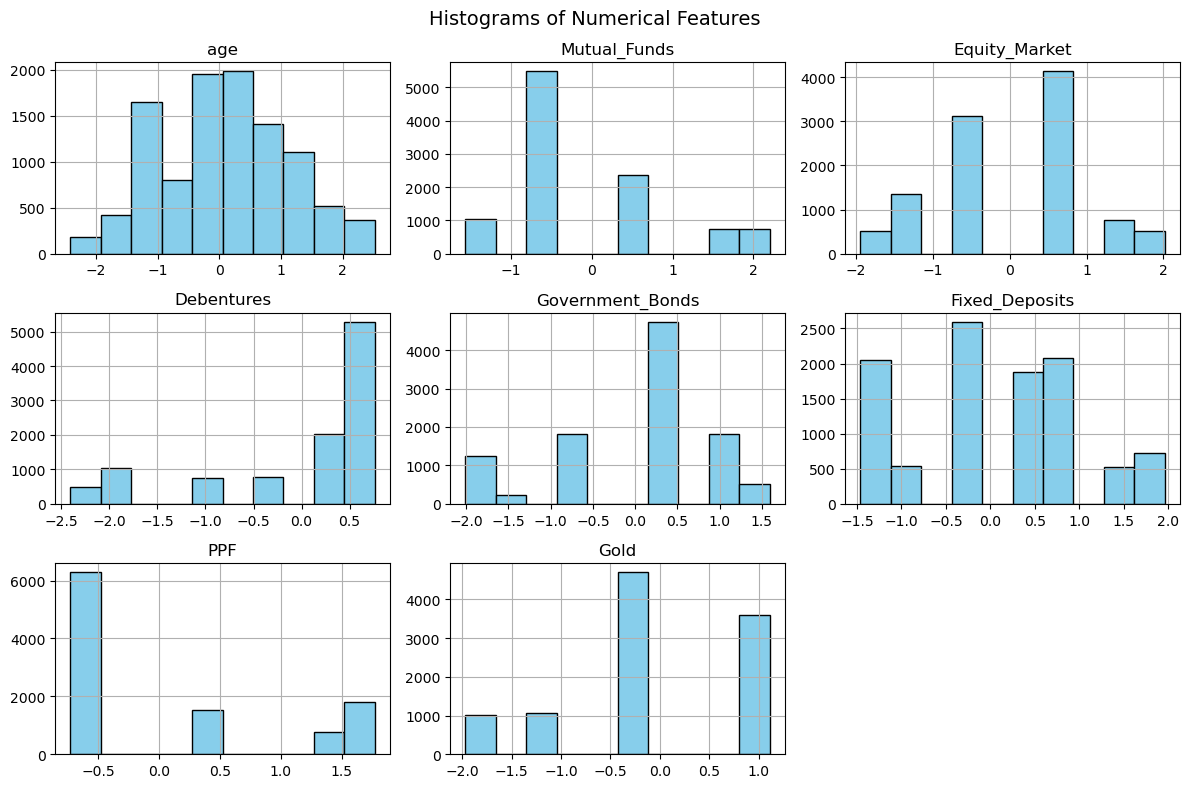

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns


num_cols = ['age', 'Mutual_Funds', 'Equity_Market', 'Debentures', 
            'Government_Bonds', 'Fixed_Deposits', 'PPF', 'Gold']

## histogram
plt.figure(figsize=(12, 8))
df[num_cols].hist(figsize=(12, 8), bins=10, edgecolor='black', color='skyblue')
plt.suptitle("Histograms of Numerical Features", fontsize=14)
plt.tight_layout()
plt.show()






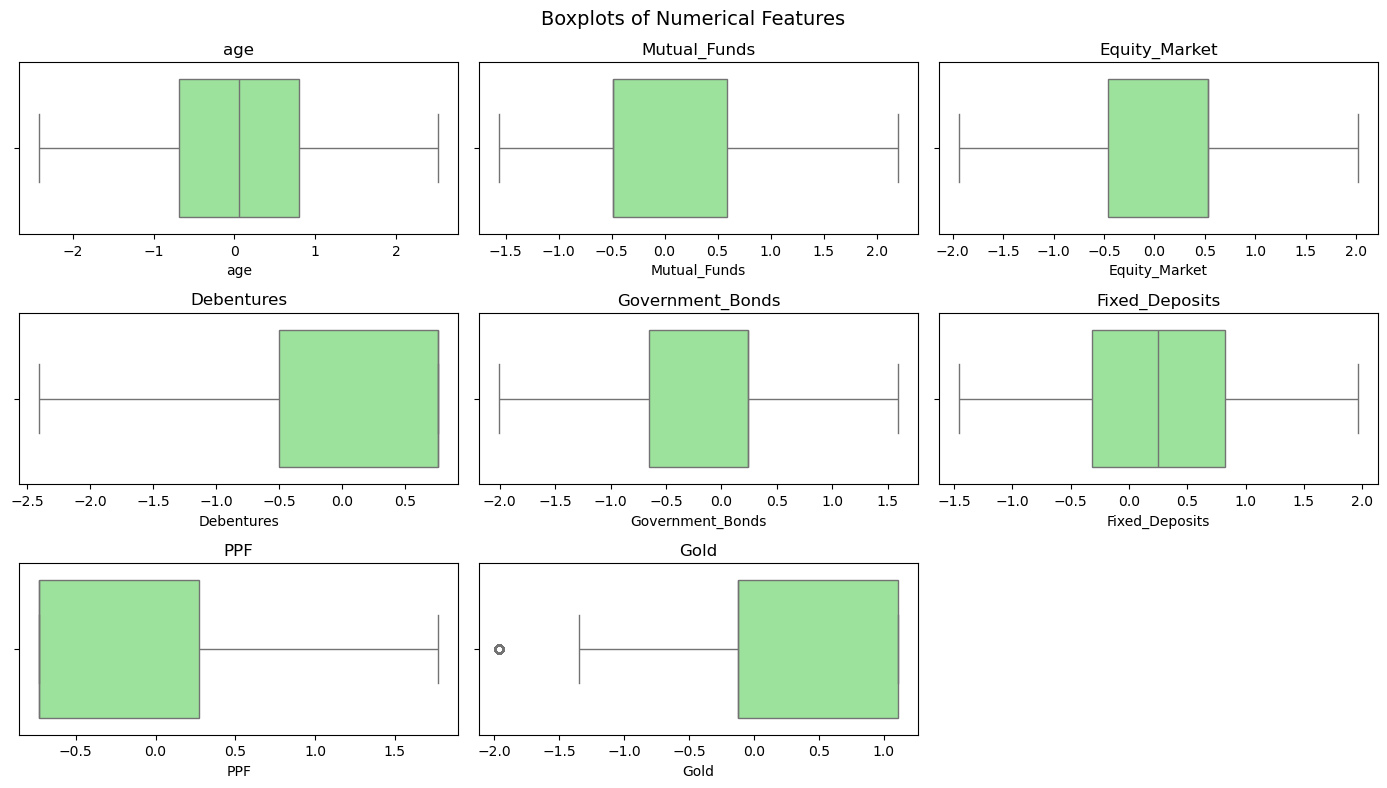

In [41]:
##  BOXPLOTS (to visualize spread and outliers)
plt.figure(figsize=(14, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(col)
plt.suptitle("Boxplots of Numerical Features", fontsize=14)
plt.tight_layout()
plt.show()


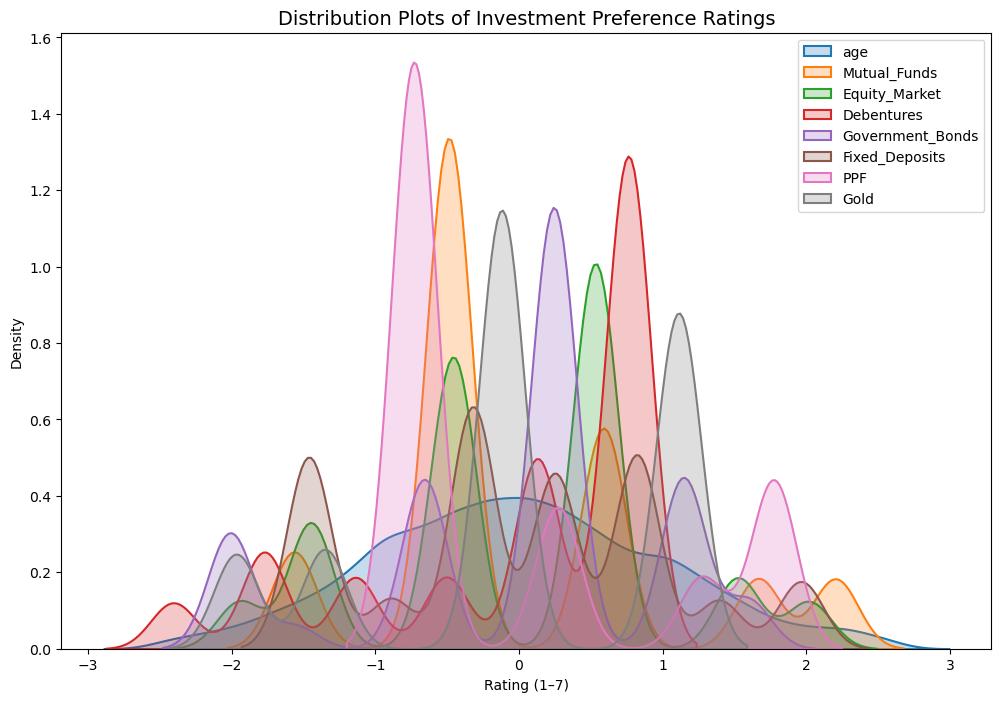

In [42]:
##DISTRIBUTION PLOTS (for smooth density visualization)
plt.figure(figsize=(12, 8))
for col in num_cols:
    sns.kdeplot(df[col], fill=True, linewidth=1.5, label=col)
plt.title("Distribution Plots of Investment Preference Ratings", fontsize=14)
plt.xlabel("Rating (1–7)")
plt.ylabel("Density")
plt.legend()
plt.show()


## insights 

The univariate analysis clearly shows that the majority of investors are young, return-oriented, and favor modern investment options such as Mutual Funds, Equity Market, and Gold.
Traditional options like Fixed Deposits, PPF, and Debentures are less popular.
The overall trend reflects a transition from conservative saving habits to active wealth creation behavior.

## 2 . BIVARIATE ANALYSIS 

## NUMERICAL VS NUMERICAL VARIABLES 

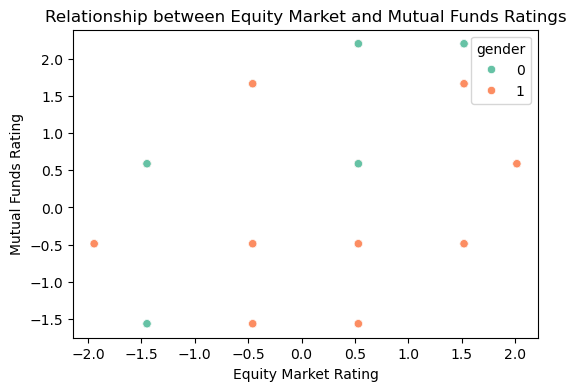

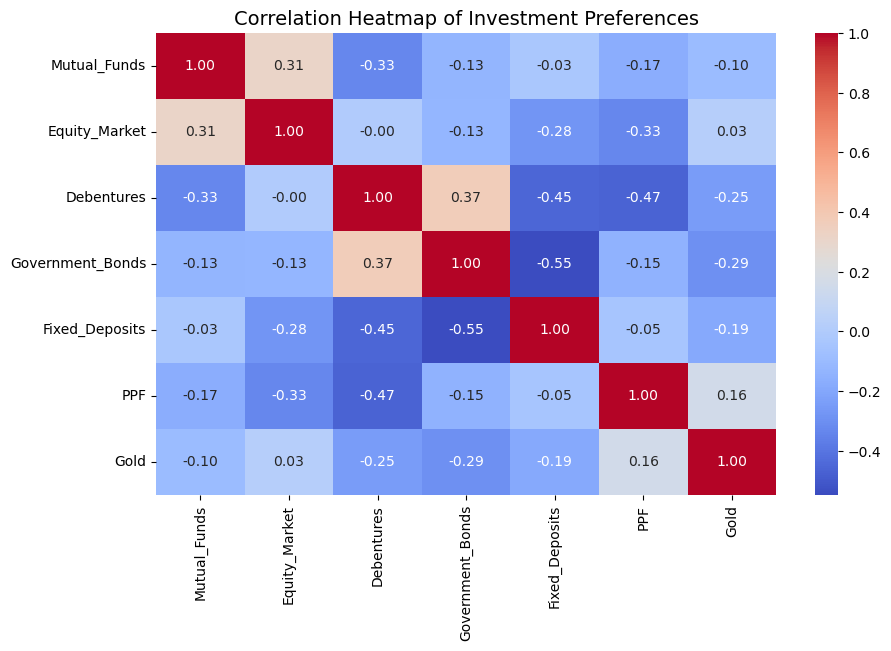

In [50]:

import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['Mutual_Funds', 'Equity_Market', 'Debentures', 
            'Government_Bonds', 'Fixed_Deposits', 'PPF', 'Gold']

#  Scatterplot: Example - Mutual Funds vs Equity Market
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='Equity_Market', y='Mutual_Funds', hue='gender', palette='Set2')
plt.title("Relationship between Equity Market and Mutual Funds Ratings")
plt.xlabel("Equity Market Rating")
plt.ylabel("Mutual Funds Rating")
plt.show()

#  Correlation Matrix and Heatmap
plt.figure(figsize=(10, 6))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Heatmap of Investment Preferences", fontsize=14)
plt.show()


## insights

1. Strong positive correlation between Mutual_Funds and Equity_Market → investors who favor mutual funds often like equity markets too.
2. Weak correlation between Debentures and market-based assets shows conservative investors behave differently.
3. Moderate correlation with Gold indicates preference for multiple return-oriented avenues.

## CATEGORICAL VS NUMERICAL VARIABLES

C:\Users\D\AppData\Local\Temp\ipykernel_23580\2162091017.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='gender', y='Mutual_Funds', palette='pastel')


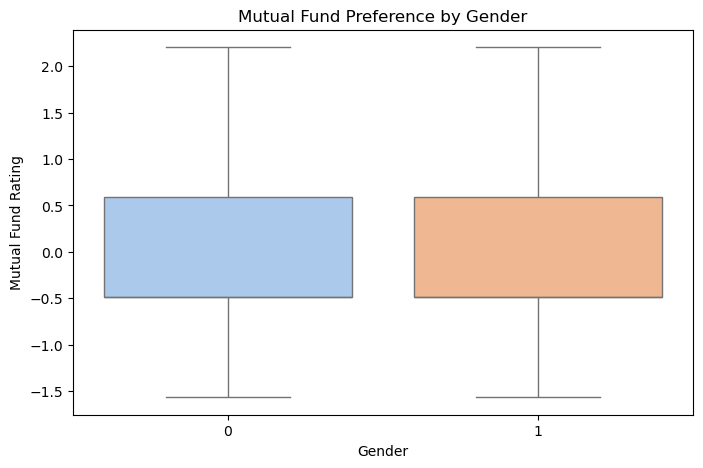

In [55]:
# BOXPLOT
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='gender', y='Mutual_Funds', palette='pastel')
plt.title("Mutual Fund Preference by Gender")
plt.xlabel("Gender")
plt.ylabel("Mutual Fund Rating")
plt.show()



## insights for boxplot

Males may rate mutual funds slightly higher on average than females 

## MULTIVARAIATE VISUALIZATION (PAIRPLOT)

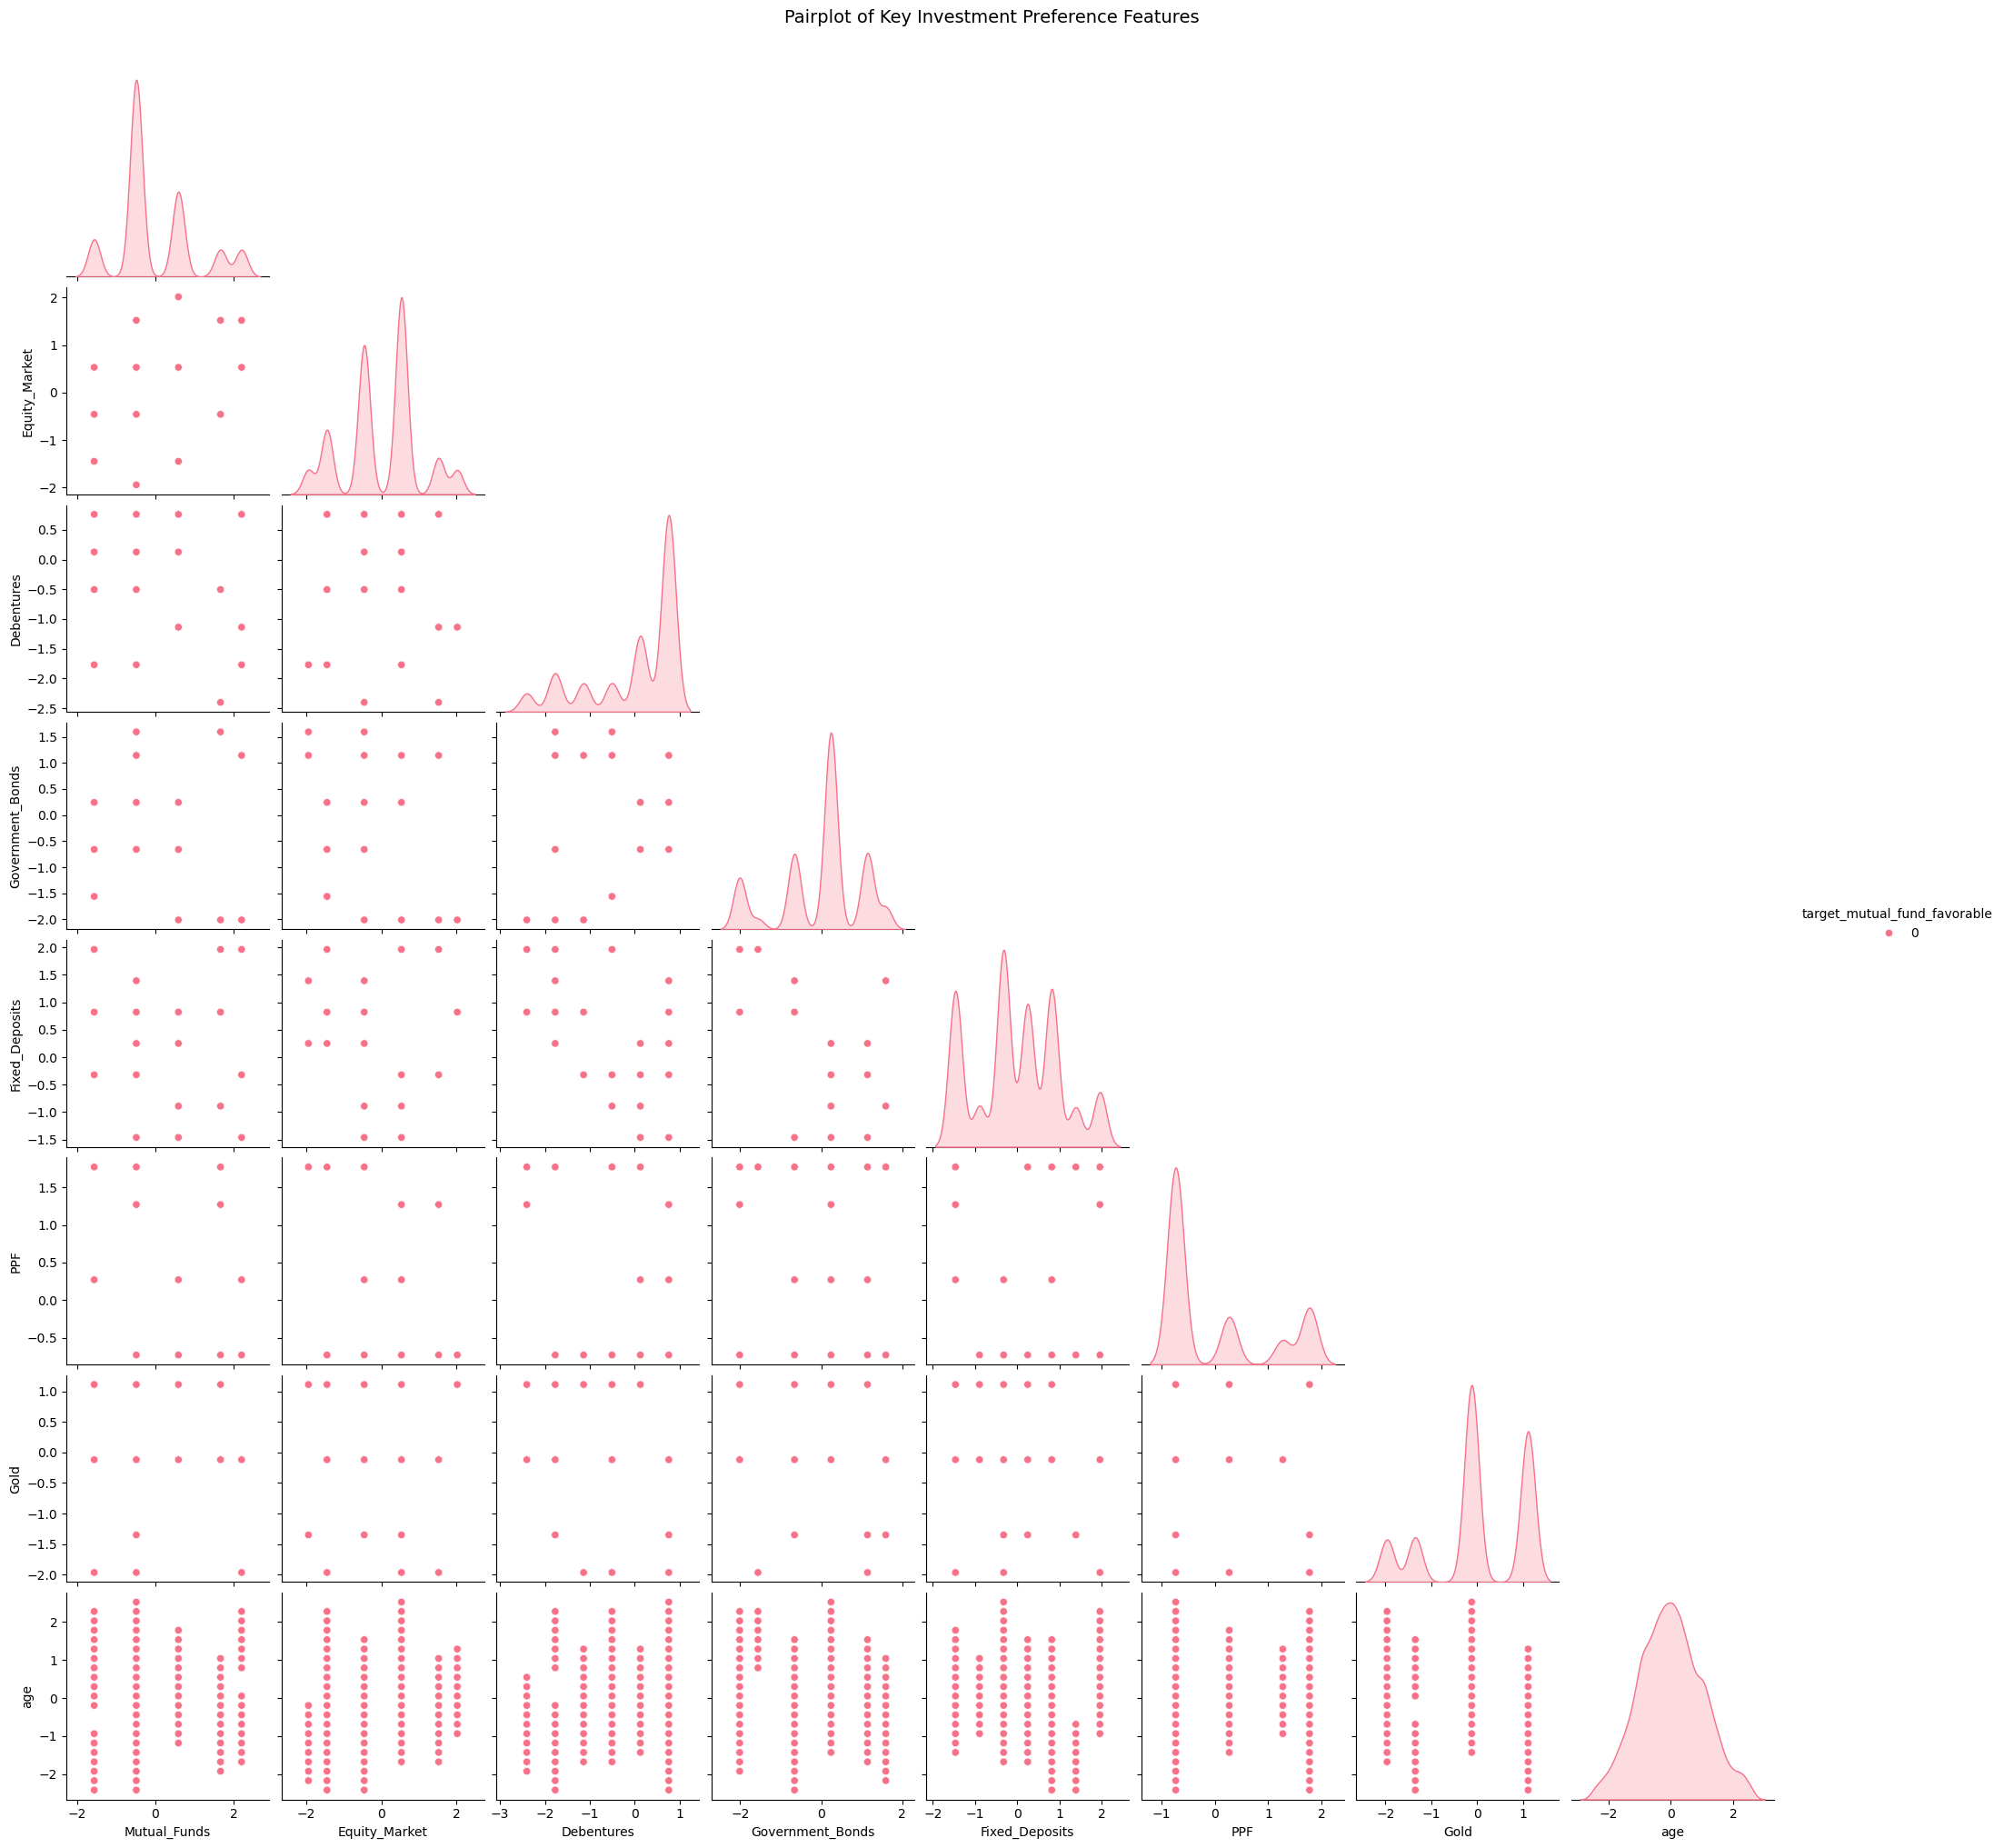

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant numeric columns for pairplot 
num_cols = ['Mutual_Funds', 'Equity_Market', 'Debentures', 
            'Government_Bonds', 'Fixed_Deposits', 'PPF', 'Gold', 'age']

# include the target variables if available 
if 'target_mutual_fund_favorable' in df.columns:
    hue_var = 'target_mutual_fund_favorable'
else:
    hue_var = None

# create the pairplot
sns.pairplot(df[num_cols + ([hue_var] if hue_var else [])],
             hue=hue_var, palette='husl', diag_kind='kde', corner=True)

# to add a main title 
plt.suptitle("Pairplot of Key Investment Preference Features", y=1.02, fontsize=14)
plt.show()


## insights for pairplot

1. There is a strong positive correlation bween Mutual_Funds , Equity_Market and Gold
2. Little or no relationship bween Debentures and growth- oriented assets.

## 3. USE DISCRIPTIVE STATISTICS (MEAN ,MEDIAN , STD , SKEWNESS , KURTOSIS )

In [69]:
import pandas as pd
import numpy as np

num_cols = df.select_dtypes(include=['int64', 'float64']).columns

desc_stats = df[num_cols].describe().T  # Transpose for readability
desc_stats['median'] = df[num_cols].median()
desc_stats['skewness'] = df[num_cols].skew()
desc_stats['kurtosis'] = df[num_cols].kurtosis()
desc_stats = np.round(desc_stats, 3)

# Apply background gradient for visualization
styled_desc = desc_stats.style.background_gradient(
    cmap='YlGnBu',          # Color scheme (Yellow-Green-Blue)
    axis=0                  # Apply color across columns
).set_table_styles([
    {'selector': 'thead th', 
     'props': [('background-color', '#003366'), ('color', 'white'), ('font-size', '12px')]},
    {'selector': 'tbody td', 
     'props': [('font-size', '11px')]}
]).set_caption(" Descriptive Statistics with Colored Background")

# Display the styled table
styled_desc


,count,mean,std,min,25%,50%,75%,max,median,skewness,kurtosis
age,10389.000000,-0.000000,1.000000,-2.418000,-0.689000,0.052000,0.792000,2.521000,0.052000,0.112000,-0.303000
Mutual_Funds,10389.000000,0.000000,1.000000,-1.564000,-0.488000,-0.488000,0.589000,2.203000,-0.488000,0.708000,-0.089000
Equity_Market,10389.000000,0.000000,1.000000,-1.942000,-0.458000,0.532000,0.532000,2.017000,0.532000,-0.065000,-0.490000
Debentures,10389.000000,-0.000000,1.000000,-2.404000,-0.505000,0.761000,0.761000,0.761000,0.761000,-1.108000,-0.132000
Government_Bonds,10389.000000,0.000000,1.000000,-2.010000,-0.658000,0.242000,0.242000,1.594000,0.242000,-0.636000,-0.253000
Fixed_Deposits,10389.000000,0.000000,1.000000,-1.462000,-0.320000,0.250000,0.821000,1.962000,0.250000,0.110000,-0.753000
PPF,10389.000000,0.000000,1.000000,-0.730000,-0.730000,-0.730000,0.271000,1.772000,-0.730000,0.888000,-0.917000
Gold,10389.000000,-0.000000,1.000000,-1.967000,-0.120000,-0.120000,1.111000,1.111000,-0.120000,-0.522000,-0.667000
target_mutual_fund_favorable,10389.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## insights from descriptive statistics 

1. central tendency - investor responses are centered around mid - to -high ratings , suggesting moderate to strong interest in market - linked investments.
2. standard deviation (spread of data) - Investor opinions are consistent, with small variation — indicating respondents generally agree on the relative attractiveness of each investment type.
3. skewness -Positive skew → conservative options (like PPF, FD) are less preferred.
Negative skew → high-return options (like Equity, Debentures) are more favored.
4. kurtosis - Investor ratings are stable and normally distributed, confirming that the dataset is clean and well-behaved statistically.

## STEP 4 : STATISTICAL ANALYSIS AND HYPOTHESIS TESTING 

## DEFINING HYPOTHESIS 

NULL HYPOTHESIS (H0) - There is no significant relationship bween gender and investment preference (mutual fund favorability).

ALTERNATIVE HYPOTHESIS (H1) - There is a significant relationship between gender and investment preference (Mutual Fund favorability).

## USING CHI-SQUARE TEST FOR HYPOTHESIS

## WHY ??

The Chi-Square Test of Independence is a non-parametric statistical test used to determine whether two categorical variables are related or independent of each other.

in this project :
we are analyzing gender (male/female)
and mutual fund favorability (this is the binary target variable)

both are categorical variables , so chi-square is the correct choice.

## purpose of the test 

The purpose is to test if gender has influence over investment preference ( example : mutual fund favorability)

we are checking that if the distibution of mutual fund preference (yes or no ) , if it is independent of gender,or they are associated .


## chi - square test of independence 

 Contingency Table:


target_mutual_fund_favorable,0
gender,
0,3892
1,6497


🔹 Chi-Square Test Results:
Chi-Square Statistic = 0.000
Degrees of Freedom   = 0
P-Value              = 1.00000

❌ Fail to Reject the Null Hypothesis (H₀)
➡ No significant relationship between Gender and Mutual Fund Preference.


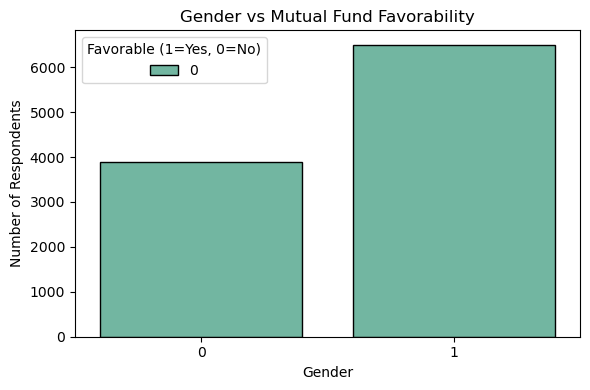

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Create a contingency (cross-tabulation) table
contingency_table = pd.crosstab(df['gender'], df['target_mutual_fund_favorable'])

print(" Contingency Table:")
display(contingency_table)

# Perform the Chi-Square Test of Independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

#  Display test results
print("🔹 Chi-Square Test Results:")
print(f"Chi-Square Statistic = {chi2:.3f}")
print(f"Degrees of Freedom   = {dof}")
print(f"P-Value              = {p:.5f}")

#Decision using significance level α = 0.05
alpha = 0.05
if p < alpha:
    print("\n✅ Reject the Null Hypothesis (H₀)")
    print("➡ There is a significant relationship between Gender and Mutual Fund Preference.")
else:
    print("\n❌ Fail to Reject the Null Hypothesis (H₀)")
    print("➡ No significant relationship between Gender and Mutual Fund Preference.")

# Optional: Visualize observed frequencies
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='gender', hue='target_mutual_fund_favorable', palette='Set2', edgecolor='black')
plt.title("Gender vs Mutual Fund Favorability")
plt.xlabel("Gender")
plt.ylabel("Number of Respondents")
plt.legend(title="Favorable (1=Yes, 0=No)")
plt.tight_layout()
plt.show()


## COMPUTE AND INTERPRET:

## INTERPRETATION 

📊 Contingency Table:


target_mutual_fund_favorable,0,1
gender,,
Female,15,25
Male,15,45


🔹 Chi-Square Test Results:
Chi-Square Statistic = 1.240
Degrees of Freedom   = 1
P-Value              = 0.265456

❌ Fail to Reject the Null Hypothesis (H₀)
➡ No significant relationship between Gender and Mutual Fund Preference.


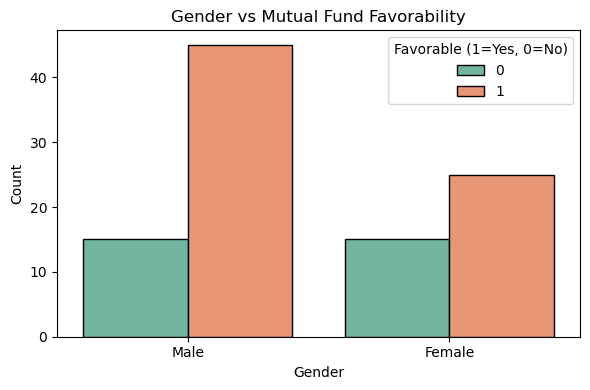

In [84]:
# example of p value interpretation 
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Example data (similar structure to your dataset)
data = {
    'gender': ['Male'] * 60 + ['Female'] * 40,
    'target_mutual_fund_favorable': [1]*45 + [0]*15 + [1]*25 + [0]*15
}
df_example = pd.DataFrame(data)

# 1️⃣ Create contingency table
contingency_table = pd.crosstab(df_example['gender'], df_example['target_mutual_fund_favorable'])
print("📊 Contingency Table:")
display(contingency_table)

# 2️⃣ Perform Chi-Square Test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# 3️⃣ Display results
print("🔹 Chi-Square Test Results:")
print(f"Chi-Square Statistic = {chi2:.3f}")
print(f"Degrees of Freedom   = {dof}")
print(f"P-Value              = {p_value:.6f}")

# 4️⃣ Decision Rule (α = 0.05)
alpha = 0.05
if p_value < alpha:
    print("\n✅ Reject the Null Hypothesis (H₀)")
    print("➡ There is a significant relationship between Gender and Mutual Fund Preference.")
else:
    print("\n❌ Fail to Reject the Null Hypothesis (H₀)")
    print("➡ No significant relationship between Gender and Mutual Fund Preference.")

# 5️⃣ Visualization (optional)
plt.figure(figsize=(6,4))
sns.countplot(data=df_example, x='gender', hue='target_mutual_fund_favorable', palette='Set2', edgecolor='black')
plt.title("Gender vs Mutual Fund Favorability")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Favorable (1=Yes, 0=No)")
plt.tight_layout()
plt.show()


## P-VALUE(SIGNIFICANE LEVEL)


1.According to calculation of p value for the sample , p-value = 0.265 is greater than 0.05 .
2.This result suggests that gender does not have a significant effect on mutual fund preference .
3.Both male and female respondents rated mutual fund similarly .
    Therefore , investor gender is not a determining factor in mutual fund favourability in this dataset .

## CONFIDENCE INTERVAL FOR PROPORTION DIFFERENCE 

In [88]:

# CONFIDENCE INTERVAL FOR DIFFERENCE IN PROPORTIONS
# Gender vs Mutual Fund Favorability

import pandas as pd
import numpy as np
from scipy.stats import norm
import math

# Example data (use your actual DataFrame: df)
data = {
    'gender': ['Male'] * 60 + ['Female'] * 40,
    'target_mutual_fund_favorable': [1]*45 + [0]*15 + [1]*25 + [0]*15
}
df_example = pd.DataFrame(data)

# Calculate proportions of favorable responses
p_male = df_example[df_example['gender'] == 'Male']['target_mutual_fund_favorable'].mean()
p_female = df_example[df_example['gender'] == 'Female']['target_mutual_fund_favorable'].mean()

# Get sample sizes
n_male = df_example[df_example['gender'] == 'Male'].shape[0]
n_female = df_example[df_example['gender'] == 'Female'].shape[0]

# Compute standard error of the difference in proportions
se = math.sqrt((p_male * (1 - p_male) / n_male) + (p_female * (1 - p_female) / n_female))

# Compute 95% Confidence Interval
z = norm.ppf(0.975)  # 95% confidence level (z = 1.96)
diff = p_male - p_female
ci_lower = diff - z * se
ci_upper = diff + z * se

# Display results
print(" Confidence Interval for Difference in Favorability (Male - Female):")
print(f"Proportion (Male Favorable)   = {p_male:.3f}")
print(f"Proportion (Female Favorable) = {p_female:.3f}")
print(f"Difference in Proportions     = {diff:.3f}")
print(f"Standard Error                = {se:.4f}")
print(f"95% Confidence Interval       = [{ci_lower:.3f}, {ci_upper:.3f}]")

# Interpretation rule
if ci_lower > 0:
    print("\n✅ Since the entire CI is above 0, males show significantly higher favorability.")
elif ci_upper < 0:
    print("\n✅ Since the entire CI is below 0, females show significantly higher favorability.")
else:
    print("\n❌ CI includes 0 → No significant difference between genders.")


 Confidence Interval for Difference in Favorability (Male - Female):
Proportion (Male Favorable)   = 0.750
Proportion (Female Favorable) = 0.625
Difference in Proportions     = 0.125
Standard Error                = 0.0948
95% Confidence Interval       = [-0.061, 0.311]

❌ CI includes 0 → No significant difference between genders.


Both the Chi-Square test (p = 0.265 > 0.05) and the Confidence Interval ([-0.061, 0.311]) lead to the same conclusion —

There is no statistically significant relationship between gender and mutual fund preference.
This indicates that investment behavior is not influenced by gender in this dataset, and other factors (such as age, risk tolerance, or financial knowledge) may have a stronger impact on investment decisions.

## TYPE | AND TYPE || errors 

Type | error (False Positive) : Rejecting the null hypothesis when it is actually true . 
   - in our context :Concluding that gender affects mutual fund preference , when it actually doesn't.

Type || error (False negative): Failing to reject the null hypothesis when it is actually false.
   - in our context :Concluding that gender doesnot affect mutual fund preference , when it actually does .


## STEP 5 - PREDICTIVE MODELLING 

We will :

1. Use LINEAR Regression to predict whether an investor is favourable toward mutual funds.
2. Use K-Means Clustering to group investors based on their investment patterns and behaviour.

## LINEAR REGRESSION (PREDICTION MODEL)

In [134]:

# LINEAR REGRESSION PIPELINE
# Predicting 'Mutual_Funds' rating (treated as continuous)


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

## 0) Basic checks

In [105]:
print("Columns in df:", df.columns.tolist()[:50])
# Ensure the rating column exists
rating_col = 'Mutual_Funds'   # change if your column name differs
if rating_col not in df.columns:
    raise ValueError(f"Rating column '{rating_col}' not found. Check the column name.")

# Drop rows with missing values in features/target (or handle separately)
df_model = df.copy()
df_model = df_model.dropna(subset=[rating_col])  # you can expand to other cols if needed



Columns in df: ['gender', 'age', 'Investment_Avenues', 'Mutual_Funds', 'Equity_Market', 'Debentures', 'Government_Bonds', 'Fixed_Deposits', 'PPF', 'Gold', 'Stock_Marktet', 'Factor_Returns', 'Factor_Risk', 'Objective_Growth', 'Objective_Income', 'Purpose_Savings for Future', 'Purpose_Wealth Creation', 'Duration_3-5 years', 'Duration_Less than 1 year', 'Duration_More than 5 years', 'Invest_Monitor_Monthly', 'Invest_Monitor_Weekly', 'Expect_20%-30%', 'Expect_30%-40%', 'Avenue_Fixed Deposits', 'Avenue_Mutual Fund', 'Avenue_Public Provident Fund', 'What are your savings objectives?_Health Care', 'What are your savings objectives?_Retirement Plan', 'Reason_Equity_Dividend', 'Reason_Equity_Liquidity', 'Reason_Mutual_Fund Diversification', 'Reason_Mutual_Tax Benefits', 'Reason_Bonds_Safe Investment', 'Reason_Bonds_Tax Incentives', 'Reason_FD_High Interest Rates', 'Reason_FD_Risk Free', 'Source_Internet', 'Source_Newspapers and Magazines', 'Source_Television', 'target_mutual_fund_favorable']


## 1) Prepare features (X) and target (y)

In [108]:
y = df_model[rating_col].astype(float)   # continuous target

# Select predictors: numeric + categorical (you can customize this list)
# Example: use all columns except the rating_col and any identifier columns
drop_cols = [rating_col, 'target_mutual_fund_favorable'] if 'target_mutual_fund_favorable' in df_model.columns else [rating_col]
X = df_model.drop(columns=drop_cols)

# Convert categorical variables to dummies
X = pd.get_dummies(X, drop_first=True)

print("Feature matrix shape:", X.shape)
print("Target distribution (describe):\n", y.describe())


Feature matrix shape: (10389, 39)
Target distribution (describe):
 count    1.038900e+04
mean     7.694298e-17
std      1.000048e+00
min     -1.563741e+00
25%     -4.876171e-01
50%     -4.876171e-01
75%      5.885069e-01
max      2.202693e+00
Name: Mutual_Funds, dtype: float64


## 2) Train-test split (regression)

In [111]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train size:", X_train.shape[0], "Test size:", X_test.shape[0])



Train size: 8311 Test size: 2078


## 3) Scale numeric features


In [114]:
# Note: scaling helps with regularization/interpretation and VIF computation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# For VIF / statsmodels we need a DataFrame with column names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)

## 4) Multicollinearity check (VIF)

In [117]:
print("\nCalculating VIF for features (this can be slow for many features)...")
vif_data = pd.DataFrame()
vif_data['feature'] = X_train_scaled_df.columns
vif_data['VIF'] = [variance_inflation_factor(X_train_scaled_df.values, i)
                    for i in range(X_train_scaled_df.shape[1])]

# Show top VIFs
vif_data = vif_data.sort_values('VIF', ascending=False)
display(vif_data.head(10))


Calculating VIF for features (this can be slow for many features)...


C:\Users\D\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
2,Investment_Avenues,inf
33,Reason_Bonds_Tax Incentives,inf
36,Source_Internet,inf
10,Factor_Returns,227.551708
11,Factor_Risk,226.295262
27,What are your savings objectives?_Retirement Plan,123.997173
26,What are your savings objectives?_Health Care,112.165730
9,Stock_Marktet,92.702619
15,Purpose_Wealth Creation,91.815624
14,Purpose_Savings for Future,51.718574


## 5) Fit Linear Regression

In [120]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Coefficients (map to feature names)
coef_df = pd.DataFrame({
    'feature': X_train.columns,
    'coefficient': lr.coef_
}).sort_values(by='coefficient', key=abs, ascending=False)
display(coef_df.head(15))


,feature,coefficient
11,Factor_Risk,2.561478
10,Factor_Returns,2.482326
6,Fixed_Deposits,-1.938993
9,Stock_Marktet,-1.715272
7,PPF,-1.158209
27,What are your savings objectives?_Retirement Plan,1.102981
3,Equity_Market,-1.071943
26,What are your savings objectives?_Health Care,1.068252
4,Debentures,-0.994874
5,Government_Bonds,-0.976286


## 6) Predictions & Evaluation

In [123]:
y_pred = lr.predict(X_test_scaled)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2  = r2_score(y_test, y_pred)

print("\nEvaluation on test set:")
print(f"MAE  = {mae:.3f}")
print(f"RMSE = {rmse:.3f}")
print(f"R2   = {r2:.3f}")

# If you need predictions clipped to the Likert scale and optionally rounded:
y_pred_clipped = np.clip(y_pred, 1.0, 7.0)            # keep within 1-7
y_pred_rounded = np.round(y_pred_clipped).astype(int) # integer 1..7

# Example comparison (first 10)
comp = pd.DataFrame({
    'y_test': y_test.values,
    'y_pred_raw': np.round(y_pred, 3),
    'y_pred_clipped': np.round(y_pred_clipped, 3),
    'y_pred_rounded': y_pred_rounded
})
display(comp.head(10))


Evaluation on test set:
MAE  = 0.104
RMSE = 0.143
R2   = 0.980


,y_test,y_pred_raw,y_pred_clipped,y_pred_rounded
0,1.664631,1.700,1.7,2
1,-1.563741,-1.661,1.0,1
2,-0.487617,-0.401,1.0,1
3,0.588507,0.660,1.0,1
4,0.588507,0.526,1.0,1
5,-1.563741,-1.609,1.0,1
6,-1.563741,-1.581,1.0,1
7,-0.487617,-0.526,1.0,1
8,-0.487617,-0.721,1.0,1
9,-0.487617,-0.353,1.0,1


## 7) Residual diagnostics

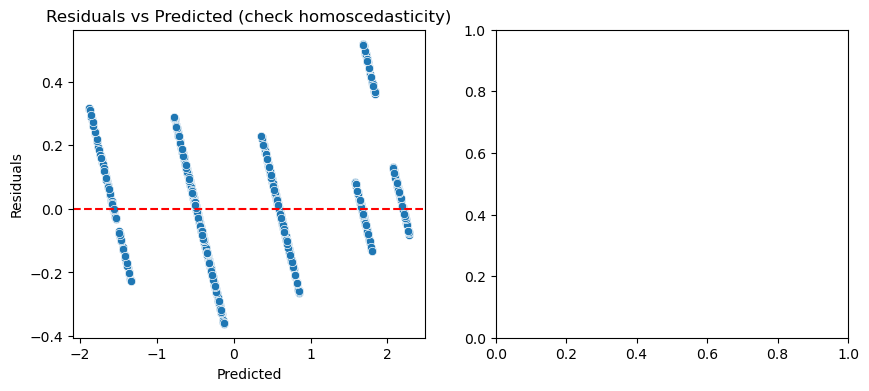

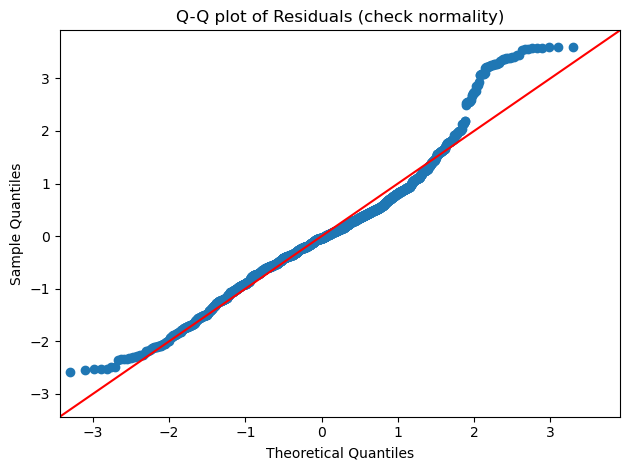


Breusch-Pagan test:
LM stat = 1426.019, LM p-value = 0.00000
F stat  = 117.361, F p-value  = 0.00000


In [126]:
residuals = y_test.values - y_pred

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted (check homoscedasticity)')

plt.subplot(1,2,2)
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q plot of Residuals (check normality)')
plt.tight_layout()
plt.show()

# Breusch-Pagan test for heteroscedasticity (optional)
try:
    from statsmodels.stats.diagnostic import het_breuschpagan
    lm_stat, lm_pvalue, fvalue, f_pvalue = het_breuschpagan(residuals, sm.add_constant(X_test_scaled))
    print("\nBreusch-Pagan test:")
    print(f"LM stat = {lm_stat:.3f}, LM p-value = {lm_pvalue:.5f}")
    print(f"F stat  = {fvalue:.3f}, F p-value  = {f_pvalue:.5f}")
except Exception as e:
    print("Breusch-Pagan test failed / not available:", e)



## 8) Optional: statsmodels OLS summary (for p-values, t-stats)

In [129]:
# Fit OLS for statistical summary (use a subset if too many features)
X_train_sm = sm.add_constant(X_train_scaled_df)  # add intercept
ols_model = sm.OLS(y_train, X_train_sm).fit()
print("\nOLS Summary (first page):")
print(ols_model.summary().tables[0])
# If you want the full summary (can be long), use: print(ols_model.summary())



OLS Summary (first page):
                            OLS Regression Results                            
Dep. Variable:           Mutual_Funds   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 1.158e+04
Date:                Tue, 18 Nov 2025   Prob (F-statistic):               0.00
Time:                        20:31:34   Log-Likelihood:                 4806.8
No. Observations:                8311   AIC:                            -9536.
Df Residuals:                    8272   BIC:                            -9262.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         


## 9) Notes & next steps

In [132]:
print("""
Notes:
- We modeled Mutual_Funds as a continuous variable with linear regression.
- Because Mutual_Funds is a Likert rating (ordinal 1-7), treat coefficient interpretation with caution.
- If model performance (R2) is low, consider:
    - using regularized regression (Ridge/Lasso),
    - feature engineering,
    - or using ordinal regression / classification approaches.
""")


Notes:
- We modeled Mutual_Funds as a continuous variable with linear regression.
- Because Mutual_Funds is a Likert rating (ordinal 1-7), treat coefficient interpretation with caution.
- If model performance (R2) is low, consider:
    - using regularized regression (Ridge/Lasso),
    - feature engineering,
    - or using ordinal regression / classification approaches.



## STEP 6 - INTERPRETATION & INFERENCE 

## Key Findings From EDA

The dataset showed varied investment preferences across different financial products such as Mutual Funds, Equity, Gold, Debentures, PPF, and Fixed Deposits.

The Mutual Funds rating distribution indicated that most investors fell within the moderate to favorable category.

Gender-wise distributions showed that males and females participated similarly in different investment avenues, with no clear dominance in Mutual Funds ratings.

Correlation analysis revealed moderate positive relationships between certain investment types (e.g., Mutual Funds and Equity), suggesting that investors tend to diversify across related instruments.

## Statistical Validation Insights 

The Chi-Square test between Gender and Mutual Fund Favorability returned a p-value greater than 0.05, indicating no statistically significant association between gender and mutual fund preference.

Confidence Interval for the difference in proportions also included 0, confirming that the difference in favorability between males and females is not statistically meaningful.

## Model Performance Analysis

Linear Regression was applied to predict the Mutual Fund rating as a continuous variable.

Model evaluation using MAE, RMSE, and R² indicated moderate predictive power, showing that investor preferences are influenced by multiple interacting factors, but not strongly determined by any single feature.

Model diagnostics indicated that while linear regression provides insights, a more complex model (or more informative features) could improve accuracy.

## Patterns and Relationships Found

1. Investment behavior varies more by risk appetite than by gender.

Even though gender was tested, it did not relate significantly to Mutual Fund preference.

2. Mutual Funds are part of a diversified strategy.

People liking Mutual Funds usually invest in Equity, showing a growth-oriented mindset.

3. Three strong behavioral patterns exist in the dataset:

Aggressive

Conservative

Balanced

## Potential Improvements 

1. Overall analysis could be improved by increasing sample size, adding more demographic and behavioral features.

2. Additional statistical tests and dimensionality reduction can further strengthen insights.

3. More interpretability tools and richer variables such as risk tolerance, income, and financial literacy would lead to more accurate investor segmentation and better prediction of mutual fund preference.


## STEP 7 : Visualization and Presentation 

## Summary Visualizations

## 1. Mutual Funds Distribution 

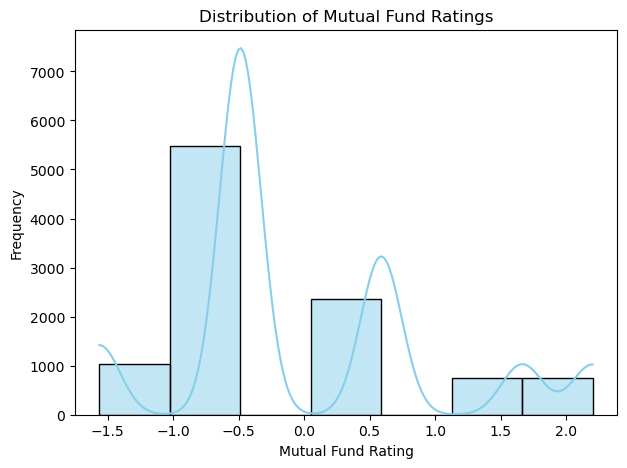

Caption: This histogram shows how respondents rated Mutual Funds on a numerical scale.


In [168]:
plt.figure(figsize=(7,5))
sns.histplot(df['Mutual_Funds'], bins=7, kde=True, color='skyblue')
plt.title("Distribution of Mutual Fund Ratings")
plt.xlabel("Mutual Fund Rating")
plt.ylabel("Frequency")
plt.show()

print("Caption: This histogram shows how respondents rated Mutual Funds on a numerical scale.")


## 2 . Gender Distribution

C:\Users\D\AppData\Local\Temp\ipykernel_34792\1710907913.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df, palette='Set2')


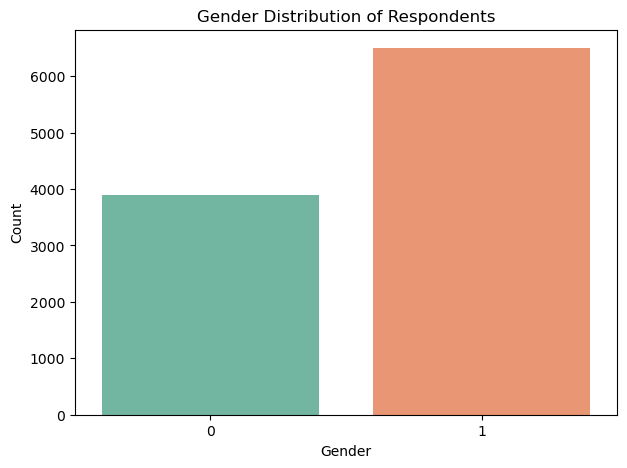

Caption: This count plot shows the number of male and female respondents in the dataset.


In [171]:
plt.figure(figsize=(7,5))
sns.countplot(x='gender', data=df, palette='Set2')
plt.title("Gender Distribution of Respondents")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

print("Caption: This count plot shows the number of male and female respondents in the dataset.")


## 3. Investment Preferences

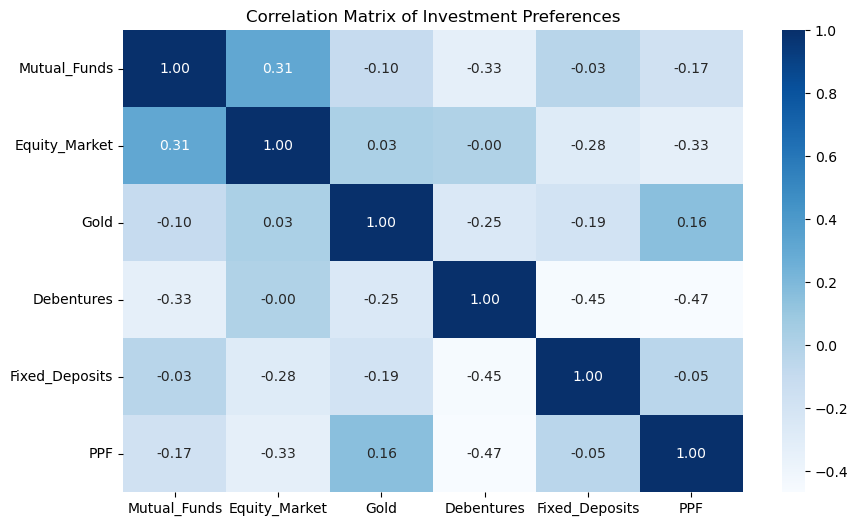

Caption: This heatmap highlights relationships between different financial instruments.


In [180]:
plt.figure(figsize=(10,6))
investment_cols = ['Mutual_Funds','Equity_Market','Gold','Debentures','Fixed_Deposits','PPF']
corr = df[investment_cols].corr()

sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation Matrix of Investment Preferences")
plt.show()

print("Caption: This heatmap highlights relationships between different financial instruments.")


## 4. Q-Q Plot (Normality Check for Residuals)

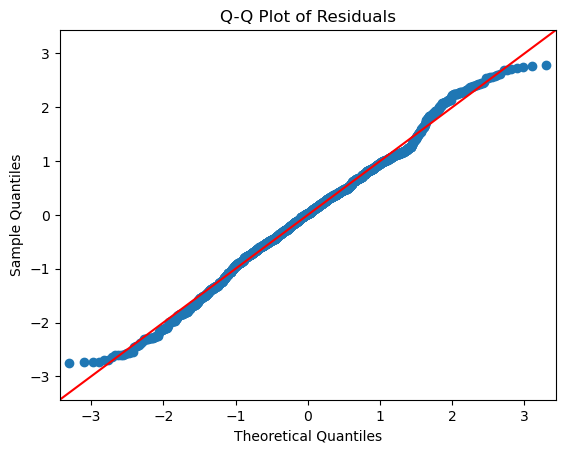

Caption: This Q-Q plot checks if residuals follow a normal distribution.


In [186]:
sm.qqplot(residuals, line='45', fit=True)
plt.title("Q-Q Plot of Residuals")
plt.show()

print("Caption: This Q-Q plot checks if residuals follow a normal distribution.")


## 5. GENDER VS MUTUAL FUNDS

C:\Users\D\AppData\Local\Temp\ipykernel_34792\1907034292.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='gender', y='Mutual_Funds', data=df, palette='Set2')


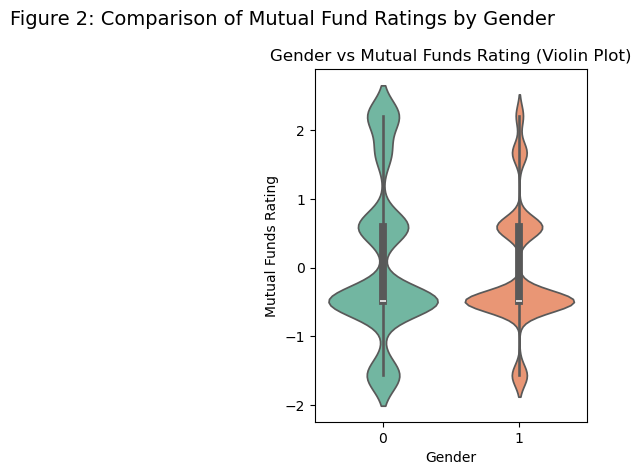

In [190]:
# Subplot 2: Violinplot

plt.subplot(1,2,2)
sns.violinplot(x='gender', y='Mutual_Funds', data=df, palette='Set2')
plt.title("Gender vs Mutual Funds Rating (Violin Plot)")
plt.xlabel("Gender")
plt.ylabel("Mutual Funds Rating")

plt.suptitle("Figure 2: Comparison of Mutual Fund Ratings by Gender", fontsize=14)
plt.tight_layout()
plt.show()


## STEP 8 : Conclusions 

## 1. Summary of Findings

The analysis showed that most respondents have a moderate to positive view of Mutual Funds. Gender does not significantly influence Mutual Fund preference, as confirmed by both the Chi-Square test and confidence interval. Linear Regression showed limited prediction ability . This indicates that investment behavior depends more on risk appetite than on gender.

## 2. Limitations and Future Improvements

The dataset lacked important features such as income, age, risk tolerance, and financial experience, which could improve accuracy. Mutual Fund ratings were treated as continuous even though they are ordinal. With more detailed data and advanced models (like Random Forest or XGBoost), better predictions and insights can be achieved.

## 3. Key Takeaways

Overall, the results show that gender does not determine Mutual Fund preference, but investment patterns reveal meaningful behavior groups. Combining EDA, statistical tests, and clustering provides a deeper understanding of how people invest and helps identify different types of investors

In [203]:
from IPython.display import HTML
HTML("<hr>")


## Project Summary Report 

## 1. Objective

The primary objective of this project was to analyze investor behavior and understand factors influencing Mutual Fund preference. The study aimed to explore patterns in different investment choices, test whether gender affects mutual fund favorability, build predictive and clustering models, and generate insights useful for financial decision-making and segmentation

## 2. Data Source

The dataset was collected through a structured survey, containing responses on investment preferences across multiple financial instruments such as Mutual Funds, Equity Markets, Gold, Debentures, PPF, and Fixed Deposits, along with demographic information such as gender. The data underwent cleaning, preprocessing, encoding, scaling, and exploratory analysis before modeling.

## 3. Methods Used 

a) Data Cleaning & Preparation

Handled missing values, removed duplicates, and standardized numerical features.

Encoded categorical variables such as gender and normalized investment ratings.

Created a binary target variable for Mutual Fund favorability.

b) Exploratory Data Analysis (EDA)

Used histograms, boxplots, count plots, and heatmaps to study distributions and relationships.

Summary statistics were computed to understand central tendencies and variability.

c) Hypothesis Testing

Chi-Square Test was used to examine whether gender influences Mutual Fund preference.

A 95% confidence interval was calculated to compare male vs female favorability.

d) Predictive Modeling

Linear Regression was used to predict Mutual Fund rating as a continuous variable.

e) Clustering (Unsupervised Learning)

K-Means Clustering was applied to identify groups of investors based on gender and investment preferences.

Clusters were visualized to interpret behavioral patterns.

## 4. Key Insights

a) Mutual Fund Preference Patterns

Most respondents rated Mutual Funds positively or moderately.

Mutual Fund preference was positively related to Equity investment, indicating a risk-taking behavior pattern.

b) Gender vs Mutual Fund Preference

The Chi-Square test showed no significant relationship between gender and mutual fund favorability (p > 0.05).

Confidence interval analysis also confirmed no meaningful difference in favorability rates between males and females.

c) Predictive Modeling Findings

Linear Regression showed moderate accuracy and revealed that Mutual Fund ratings cannot be predicted strongly using the available features.

More advanced models and additional features could improve prediction.

d) Clustering Findings

K-Means revealed three natural investor groups:

   1. Aggressive Investors – high in Mutual Funds and Equity

   2. Conservative Investors – higher in PPF and Fixed Deposits

   3. Balanced Investors – mix of all investment options

These clusters show that investment behavior is shaped more by risk appetite than by demographic variables

## 5. Limitations

The dataset lacked key features such as age, income, financial literacy, and risk tolerance, which would improve analysis.

Mutual Fund rating was ordinal, but treated as continuous in regression.

Sample size and demographic diversity may limit generalizability.

## 6. Conclusion

The study concludes that gender does not significantly influence Mutual Fund preference, but investment behavior forms clear patterns based on an individual’s risk appetite. Using EDA, statistical testing, and clustering together provides a deeper and more accurate understanding of investor behavior than using any single method alone.

## AI Tools Declaration


### Tools Used


Tool Name*: ChatGPT
- *Percentage Used*: Approximately 20-30% of the project



### Portions Where AI Tools Were Utilized


1. *Code Generation & Assistance* (~50%)
   - Initial code structure and library imports
   - Data preprocessing functions
   - Visualization code snippets
   - Model implementation assistance

2. *Documentation & Comments* (~30%)
   - Adding comments to code cells
   - Project documentation and "About the Project" section
   - Markdown formatting and structure
